In [1]:
# packages 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import scipy.stats as stats

import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors
from matplotlib.transforms import ScaledTranslation

# from Bio import SeqIO
# from Bio.SeqUtils import GC

pd.set_option('display.max_colwidth', None)

# plot global parameters
mpl.rcParams['figure.figsize'] = [1, 0.8]

# display axis spines
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# font sizes
fontSize = 7
mpl.rcParams["axes.labelsize"]= fontSize
mpl.rcParams[ "xtick.labelsize"]= fontSize
mpl.rcParams["ytick.labelsize"]= fontSize
mpl.rcParams["legend.fontsize"]= fontSize
mpl.rcParams["font.size"]= fontSize


# line widths
mpl.rcParams["axes.linewidth"]= 0.5
mpl.rcParams["grid.linewidth"]= 0.5
mpl.rcParams["lines.linewidth"]= 1.
mpl.rcParams["lines.markersize"]= 3

# tick sizes
mpl.rcParams["xtick.major.size"]= 2
mpl.rcParams["ytick.major.size"]= 2
mpl.rcParams["xtick.major.width"]= 0.5
mpl.rcParams["ytick.major.width"]= 0.5
# mpl.rcParams["xtick.top"]= False
# mpl.rcParams["ytick.right"]= False

# save figure
mpl.rcParams["savefig.bbox"]= "tight"
mpl.rcParams["savefig.pad_inches"]= 0.05



# function here
def Gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = array.to_numpy()
    array = array.flatten() #all values are treated equally, arrays must be 1d
    array = np.maximum(array, 0)
    array = np.add(array, 0.0000001, out=array, casting="unsafe") #values cannot be 0
    array = np.sort(array) # values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0] # number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

def calculate_gini_index(values):
    """Calculate the Gini index of an array of values."""
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(values, values)).mean()
    # Relative mean absolute difference
    rmad = mad / np.mean(values)
    # Gini coefficient
    g = 0.5 * rmad
    return g

# color
color = ["#F5E9CA", "#DDAAAB", "#B2CFEB", "#CDE6E0", "#C0B6D9"]

from matplotlib import ticker
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

# Sup1

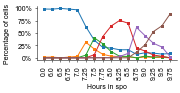

In [23]:
df = pd.read_excel('3_Table/IF counts final.xlsx', sheet_name='A14201')
df['times'] = [str(i) for i in df['time']]
df = df[df.phase.isin(['Anaphase I','Anaphase II','Disassembling','Metaphase I','Metaphase II','Monopolar'])]

plt.figure(figsize = (2.5, 1))
sns.lineplot(x = 'times', y = 'rate', hue = 'phase', data = df, marker = 's', mew = 0)
plt.xticks(rotation = 90)
plt.xlabel('Hours in spo')
plt.ylabel('Percentage of cells')
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.legend().remove()
plt.savefig('5_Figure/Sub Fig1-a A14200 IF counts.pdf', bbox_inches = 'tight')
plt.show()

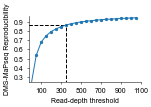

In [123]:
df = pd.read_csv('3_Table/DMS Reproducibility.csv')
    
plt.figure(figsize = (2, 1.2))

plt.scatter(df.depth_cutoff, df.pearsonr, s = 5)
plt.plot(df.depth_cutoff, df.pearsonr)

plt.xlabel('Read-depth threshold')
plt.ylabel('DMS-MaPseq Reproducibility')

plt.vlines(x = 350,ymin = 0, ymax = df.loc[df.depth_cutoff == 350, 'pearsonr'], color = 'k', linestyle = '--')
plt.hlines(y = df.loc[df.depth_cutoff == 350, 'pearsonr'], xmin = -500, xmax = 350, color = 'k', linestyle = '--')

plt.xlim(-20, 1100)
plt.ylim(0.25, 0.96)
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9])
plt.xticks([100, 300, 500, 700, 900, 1100])
plt.savefig('5_Figure/Sub Fig1-c read depth cutoff and reproducibility.pdf', bbox_inches = 'tight')
plt.show()

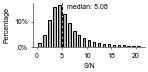

In [124]:
# dfsn = pd.read_csv('3_Table/SN_all350.csv')
# dfsn.columns = ['S/N']
# g = plt.hist(dfsn.loc[dfsn['S/N']  > 0, 'S/N'], bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 21], width =0.6)
# plt.text(s = 'cutoff: 350' +'\nmedian: '+str(round(dfsn.loc[dfsn['S/N']  > 0, 'S/N'].median(), 2)), x = 10, y = .8*10**6)
# plt.show()

plt.figure(figsize=(2, 0.8))
plt.bar([i+0.5 for i in range(21)], g[0]/dfsn.loc[dfsn['S/N']  > 0, 'S/N'].shape[0], width=0.5, color = '#B2B2B2', \
       linewidth = 1, edgecolor = 'black')

plt.axvline(x = dfsn.loc[dfsn['S/N']  > 0, 'S/N'].median(), color='k', linestyle='--', lw = 1)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1, decimals=0))

plt.text(s = 'median: ' +str(round(dfsn.loc[dfsn['S/N']  > 0, 'S/N'].median(), 2)), x = 6, y = 0.15)
plt.xlabel('S/N')
plt.ylabel('Percentage')
plt.savefig('5_Figure/Sub Fig1-e histogram of SN.pdf', bbox_inches = 'tight')
plt.show()

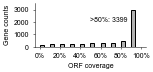

In [149]:
df = pd.read_excel('3_Table/Merged_9samples_ORF_coverage.xlsx', index_col='GENE_ID')
plt.figure(figsize=(2, 0.8))
g = plt.hist(df['Merged_ORF_coverage'], bins = [i/10 for i in range(11)], width=0.04, 
             color = '#B2B2B2', linewidth = 1, edgecolor = 'black')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xlabel('ORF coverage')
plt.ylabel('Gene counts')
plt.ylim(0,3500)
plt.yticks([0, 1000,2000,3000])
plt.text(s = '>80%: 3399', x = 0.5, y = 2000)
plt.savefig('5_Figure/Sub Fig1-f merged ORF coverage.pdf', bbox_inches = 'tight')
plt.show()

# Sup2

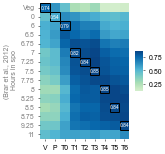

In [42]:
dfrna = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')
dfrna = dfrna[[i for i in dfrna.columns if i.startswith('RNA') and ('cluster' not in i)]]
df2 = np.log2(dfrna[dfrna > 1]).corr().loc[['RNA_YPD','RNA_0h','RNA_6h','RNA_7h','RNA_7h25','RNA_7h5','RNA_8h25','RNA_8h75', 'RNA_9h5'], 
                 ['RNA_brar_YPD', 'RNA_brar_0h', 'RNA_brar_6h', 'RNA_brar_6h5',
       'RNA_brar_6h75', 'RNA_brar_7h', 'RNA_brar_7h25', 'RNA_brar_7h5',
       'RNA_brar_7h75', 'RNA_brar_8h', 'RNA_brar_8h25', 'RNA_brar_8h5',
       'RNA_brar_8h75', 'RNA_brar_9h25', 'RNA_brar_11h']].T

def plot_pane(x1,x2,y1,y2):
    width = 0.1/5
    x01, x02, y01, y02 = x1+width, x2-width, y1+width, y2-width
    ax.hlines(y01, x01, x02, color = 'k')
    ax.hlines(y02, x01, x02 ,color = 'k')
    ax.vlines(x01, y01, y02,color = 'k')
    ax.vlines(x02, y01, y02,color = 'k')
    
    t = y2-y1
    for i in range(t):
        plt.text(x1+0.5, y1+0.5+i, str(round(df2.loc[df2.index[y1 + i],df2.columns[x1]], 2)),\
                 ha = 'center', va = 'center', color = 'white', fontsize = 5)

# 01_timepoints match up
fig = plt.figure(figsize=(2, 2.5))
new_blues= sns.color_palette("GnBu", 100)[20:100]
ax = sns.heatmap(df2, cmap = new_blues, cbar_kws={"shrink": .30, 'pad': 0.05, 'aspect':5})

tps = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
tps_brar = ['Veg', '0', '6', '6.5', '6.75', '7', '7.25', '7.5', '7.75', '8', '8.25', '8.5', '8.75', '9.25', '11']
plt.xticks([i+0.5 for i in range(9)], tps, rotation = 0)
plt.yticks([i+0.5 for i in range(15)], tps_brar, rotation = 0, alpha = 0.5)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params()

plot_pane(0, 1, 0, 1)
plot_pane(1, 2, 1, 2)
plot_pane(2, 3, 2, 3)
plot_pane(3, 4, 5, 6)
plot_pane(4, 5, 6, 7)
plot_pane(5, 6, 7, 8)
plot_pane(6, 7, 9, 10)
plot_pane(7, 8, 11, 12)
plot_pane(8, 9, 13, 14)

plt.ylabel('(Brar et al., 2012)\n Hours in spo', alpha = .5)
# plt.savefig('5_Figure/Sub Fig2-a timepoints match up.pdf', bbox_inches = 'tight')
plt.show()

In [64]:
df = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')
tps = ['YPD', '0h', '6h', '7h','7h25', '7h5','8h25', '8h75', '9h5']
matchup = {'YPD':'YPD', '0h': '0h', '6h':'6h', '7h':'7h', '7h25':'7h25', '7h5':'7h5', '8h25':'8h', '8h75': '8h5', '9h5':'9h25'}

dfgini = df[[i for i in df.columns if i.startswith('ORF_gini_')]]
dfgini.columns = tps

tpsbrar = ['YPD', '0h', '6h', '6h5', '6h75', '7h', '7h25', '7h5', '7h75', '8h', '8h25', '8h5', '8h75', '9h25', '11h']
dfRNA = df[[i for i in df.columns if i.startswith('RNA_brar_')]]
dfRNA.columns = tpsbrar
dfribo = df[[i for i in df.columns if i.startswith('Ribo_brar_')]]
dfribo.columns = tpsbrar

dfte = dfribo[dfribo>=5] / dfRNA[dfRNA>=5]
# dfte = dfribo / dfRNA[dfRNA>=1]

dfte = dfte[[matchup[i] for i in tps]]

# convert timepoints
dfte.columns = tps
dftelog = np.log2(dfte)

# dfte = dfribo[dfribo>=5] / dfRNA[dfRNA>=5]
# dfte = dfribo / dfRNA[dfRNA>=1]
# dfte['min'] = dfte.min(axis = 1)
# dfte = dfte[dfte['min'] > 0]
# dfte['FC'] = dfte.max(axis = 1)/ dfte.min(axis = 1)

SpearmanrResult(correlation=-0.3189988815303661, pvalue=2.9241405768150964e-262)


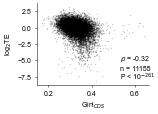

In [79]:
# all stages: Gini vs TE
x = []
y = []
for i in range(9):
    t1 = tps[i]

    x.extend(dfgini[t1].to_list()) 
    y.extend(dftelog[t1].to_list())
    
dfdata = pd.DataFrame(columns=['x', 'y'])
dfdata['x'] = x
dfdata['y'] = y
dfdata = dfdata.dropna()
corr = stats.spearmanr(dfdata['x'], dfdata['y'])[0]
print(stats.spearmanr(dfdata['x'], dfdata['y']))

plt.figure(figsize=(2, 1.5))
plt.scatter(x,y, s = 2, color = 'black', alpha = .2, linewidths = 0)
plt.text(0.53, -5, r'$\rho$ = ' + str(format(corr, '.2f')),)
plt.text(0.53, -6.5, 'n = '+str(dfdata.shape[0]) , )
plt.text(0.53, -8, r'P < 10$^{-261}$', )

plt.xlabel(r'Gini$_{CDS}$')
plt.ylabel('log${_2}$TE')
plt.savefig('5_Figure/Sub Fig2-d gini and TE spearman corr all.pdf', bbox_inches = 'tight')
plt.show()

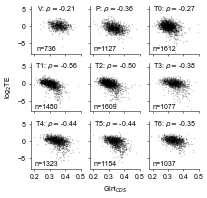

In [99]:
timepoints = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
corr_list = []
tps = ['YPD', '0h', '6h', '7h','7h25', '7h5','8h25', '8h75', '9h5']
fig = plt.figure(figsize = (3, 3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(9):
    t1 = tps[i]
    t2 = timepoints[i]
    
    ax = plt.subplot(3, 3, i+1)
    g = plt.scatter(dfgini[t1], dftelog[t1], s = 2, color = 'black', alpha = .2, linewidths = 0)
    if i == 7:
        plt.xlabel(r'Gini$_{CDS}$' )
    plt.xlim(0.18, 0.5)
    plt.ylim(-8, 6)
    if i in [6,7,8]:
        plt.xticks([0.2, 0.3, 0.4, 0.5],)
    else:
        plt.xticks([0.2, 0.3, 0.4, 0.5],[])
        
    if i in [0,3,6]:
        plt.yticks([-5, 0, 5,],)
    else:
        plt.yticks([-5, 0, 5,],[])
        
    if i == 3:
        plt.ylabel(r'log${_2}$TE')

    dfcorr = pd.DataFrame([dfgini[t1], dftelog[t1]]).reset_index(drop=True).T.dropna()
    corr = stats.spearmanr(dfcorr[0], dfcorr[1])[0]
    corr_list.append(corr)
    
    ax.text(0.5, 0.9, t2+ ': ' +r'$\rho=$' + str(format(corr, '.2f')) , 
             transform=ax.transAxes, ha = 'center')
    ax.text(0.3, 0.05, 'n='+str(dfcorr.shape[0]) , 
            transform=ax.transAxes, ha = 'center')
    
    ax = plt.gca()
    spwidth = 0.5
    ax.spines['top'].set_linewidth(spwidth)  
    ax.spines['right'].set_linewidth(spwidth) 
    ax.spines['bottom'].set_linewidth(spwidth)
    ax.spines['left'].set_linewidth(spwidth)

plt.savefig('5_Figure/Sub Fig2-e gini and te spearman corr.pdf', bbox_inches = 'tight')
plt.show()

In [101]:
# TE changes
dfdelta = pd.DataFrame()
dfdelta['maxte'] = dfte[~dfgini.isna()].max(axis = 1).dropna()
dfdelta['minte'] = dfte[~dfgini.isna()].min(axis = 1).dropna()
dfdelta['maxte_tps'] = dfte[~dfgini.isna()].idxmax(axis = 1).dropna()
dfdelta['minte_tps'] = dfte[~dfgini.isna()].idxmin(axis = 1).dropna()
dfdelta = dfdelta[dfdelta.maxte_tps != dfdelta.minte_tps]

# gini changes
dfdelta['maxte_gini'] = dfdelta.apply(lambda x: dfgini.loc[x.name, x.maxte_tps], axis = 1)
dfdelta['minte_gini'] = dfdelta.apply(lambda x: dfgini.loc[x.name, x.minte_tps], axis = 1)

dfdelta = dfdelta.dropna()

dfdelta['deltagini'] = dfdelta.maxte_gini - dfdelta.minte_gini
dfdelta['deltate'] = np.log2(dfdelta.maxte / dfdelta.minte)

(315, 8) SpearmanrResult(correlation=-0.0789739809493095, pvalue=0.16203452688167383)


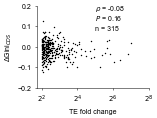

In [113]:
plt.figure(figsize=(2, 1.5))
dfdelta2 = dfdelta[dfdelta.deltate >= 2]
print(dfdelta2.shape, stats.spearmanr(dfdelta2.deltagini, dfdelta2.deltate))
plt.scatter(dfdelta2['deltate'], dfdelta2['deltagini'], alpha = 1, linewidths = 0, color = 'k',
           s= 2)

plt.xticks([2,4,6, 8], [r'$2^{2}$', r'$2^{4}$', r'$2^{6}$',  r'$2^{8}$'])

plt.text(x = 5, y = 0.18, s = r'$\rho$ = -0.08')
plt.text(x = 5, y = 0.13, s = r'$P$ = 0.16')
plt.text(x = 5, y = 0.08, s = 'n = 315')
plt.ylim(-0.2, 0.2)
plt.ylabel(r'$\Delta$Gini$_{CDS}$')
plt.xlabel('TE fold change')
plt.savefig('5_Figure/Sub Fig2-c fold change over4 delta TE vs delta Gini.pdf', bbox_inches = 'tight')
plt.show()

# Sup3

In [2]:
df = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')

In [6]:
print(df.loc[df.Ribo_cluster == 'ribo1', 'Merged_Gene_gini'].dropna().shape)
print(df.loc[df.Ribo_cluster == 'ribo2', 'Merged_Gene_gini'].dropna().shape)
print(df.loc[df.Ribo_cluster == 'ribo3', 'Merged_Gene_gini'].dropna().shape)

(930,)
(268,)
(188,)


In [116]:
print(stats.mannwhitneyu(df.loc[df.Ribo_cluster == 'ribo1', 'Merged_Gene_gini'].dropna(),
                   df.loc[df.Ribo_cluster == 'ribo2', 'Merged_Gene_gini'].dropna()))
print(stats.mannwhitneyu(df.loc[df.Ribo_cluster == 'ribo2', 'Merged_Gene_gini'].dropna(),
                   df.loc[df.Ribo_cluster == 'ribo3', 'Merged_Gene_gini'].dropna()))

MannwhitneyuResult(statistic=150832.0, pvalue=1.5006843346572338e-07)
MannwhitneyuResult(statistic=15410.0, pvalue=1.6481700135657936e-12)


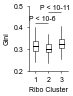

In [118]:
# mpl.rcParams['figure.figsize'] = [1, 0.8]
plt.figure(figsize = (0.7 , 1.2))
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'k', 'linewidth':'0.5'},
    'medianprops':{'color':'k', 'linewidth':'1'},
    'whiskerprops':{'color':'k', 'linewidth':'0.5'},
    'capprops':{'color':'k', 'linewidth' :0}
}

sns.boxplot(x = 'Ribo_cluster',y = 'Merged_Gene_gini', data=df, 
            width=0.35, showfliers = False, **PROPS, order = ['ribo1', 'ribo2', 'ribo3'])

ax = plt.gca()
ax.spines['top'].set_linewidth(0)  
ax.spines['right'].set_linewidth(0) 
ax.grid(False)

plt.xticks([0,1,2], ['1', '2', '3'])
plt.yticks([0.2, 0.3, 0.4, 0.5])
plt.ylim(0.2, 0.5)
# plt.xlim(-0.8, 2.5)

plt.ylabel('Gini')

plt.xlabel('Ribo Cluster')


def plot_sig(xstart,xend, yend, sig):
    plt.hlines(yend, xstart, xend, color="black", linewidth = 0.5)
    plt.annotate(r'%s'%sig, xy=((xstart + xend)/2, yend+0.01), color="black", ha='center')

plot_sig(0, 1, 0.42, 'P < 10-6')
plot_sig(1, 2, 0.47, 'P < 10-11')
# plt.savefig('5_Figure/Sub Fig3-b boxplot_riboCluster_gini_distribution.pdf',  bbox_inches = 'tight')
plt.show()

# Sup4

In [183]:
df = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')

dfribo = df[[i for i in df.columns if i.startswith('Ribo_brar_')]]
dfribo.columns = [i.strip('Ribo_brar_') for i in dfribo.columns]

tps = ['YPD', '0h', '6h', '7h','7h25', '7h5','8h25', '8h75', '9h5']
tps1 = [matchup[i] for i in tps]
tps1 = tps1[1:]
dfribo = dfribo[tps1]

dfrna = df[[i for i in df.columns if i.startswith('RNA') and ('cluster' not in i) and('brar_' not in i)]]
dfrna.columns = [i.strip('RNA_') for i in dfrna.columns]
dfrna = dfrna[dfrna.columns[1:]]

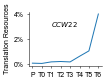

In [190]:
tps = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']

gene = 'YDR133C'

fig = plt.figure(figsize=(1.3, 1))
(dfribo.loc['YDR133C', tps1]/10**6).plot()
plt.yticks([0,0.02,0.04], ['0%', '2%', '4%'])

plt.xticks([0,1,2,3,4,5,6,7], tps[1:])
plt.text(x = 2, y = 0.03, s = r'$CCW22$')
plt.ylabel('Translation Resources')
plt.savefig('5_Figure/Sub Fig4-a CCW22 translation resource.pdf', bbox_inches = 'tight')
plt.show()

In [192]:
df = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')
df.loc[df['Meiosis_specific'] != 'yes', 'Meiosis_specific'] = 'no'

tps1 = ['YPD', '0h', '6h', '7h','7h25', '7h5','8h25', '8h75', '9h5']
matchup = {'YPD':'YPD', '0h': '0h', '6h':'6h', '7h':'7h', '7h25':'7h25', '7h5':'7h5', '8h25':'8h', '8h75': '8h5', '9h5':'9h25'}
tps = ['Ribo_brar_' + matchup[i] for i in tps1]

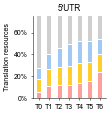

In [195]:
# Meiosis_specific RNAs ranked by structure
dfRibo = df[tps + ['Merged_5utr_gini', 'Meiosis_specific']]
dfRibo.columns = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'rank', 'meiotic']
t = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
dfRibo['rank'] = dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].rank()/dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].dropna().shape[0]

dfRibo['grank'] = 'Others'
dfRibo.loc[(dfRibo['rank'] >= 0 ) & (dfRibo.meiotic == 'yes'), 'grank'] = 'simple'
dfRibo.loc[(dfRibo['rank'] >= 1/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'moderate'
dfRibo.loc[(dfRibo['rank'] >= 2/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'complex'

# sum the ribo translation resources
dfb = dfRibo.groupby('grank').sum()[t]/dfRibo.sum()[t]

width = 0.5
plt.figure(figsize=(1.3, 1.5))
plt.bar(dfb.columns, dfb.loc['complex'], label = 'complex', color = '#FF9F9B', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['moderate'], bottom=dfb.loc['complex'], 
        label = 'moderate', color = '#FFCE2E', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['simple'],bottom=dfb.loc['complex']+ dfb.loc['moderate'], 
        label = 'simple', color = '#A1C9F4', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['Others'],bottom=dfb.loc['complex']+ dfb.loc['moderate']+dfb.loc['simple'],
        label = 'Others', color = '#CFCFCF', width=width, edgecolor='white')

plt.yticks([0, 0.2, 0.4, 0.6], ['0%', '20%', '40%', '60%'])
plt.ylabel('Translation resources')
plt.ylim(0, 0.75)
plt.title('5ʹUTR')
# plt.legend(loc = (1,0.2))

# plt.savefig('5_Figure/fig4-b translation resource allocation 5utr.pdf',  bbox_inches = 'tight')
plt.show()

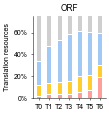

In [179]:
# Meiosis_specific RNAs ranked by structure
dfRibo = df[tps + ['Merged_ORF_gini', 'Meiosis_specific']]
dfRibo.columns = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'rank', 'meiotic']
t = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
dfRibo['rank'] = dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].rank()/dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].dropna().shape[0]

dfRibo['grank'] = 'Others'
dfRibo.loc[(dfRibo['rank'] >= 0 ) & (dfRibo.meiotic == 'yes'), 'grank'] = 'simple'
dfRibo.loc[(dfRibo['rank'] >= 1/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'moderate'
dfRibo.loc[(dfRibo['rank'] >= 2/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'complex'

# sum the ribo translation resources
dfb = dfRibo.groupby('grank').sum()[t]/dfRibo.sum()[t]

width = 0.5
plt.figure(figsize=(1.3, 1.5))
plt.bar(dfb.columns, dfb.loc['complex'], label = 'complex', color = '#FF9F9B', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['moderate'], bottom=dfb.loc['complex'], 
        label = 'moderate', color = '#FFCE2E', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['simple'],bottom=dfb.loc['complex']+ dfb.loc['moderate'], 
        label = 'simple', color = '#A1C9F4', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['Others'],bottom=dfb.loc['complex']+ dfb.loc['moderate']+dfb.loc['simple'],
        label = 'Others', color = '#CFCFCF', width=width, edgecolor='white')

plt.yticks([0, 0.2, 0.4, 0.6], ['0%', '20%', '40%', '60%'])
plt.ylabel('Translation resources')
plt.ylim(0, 0.75)
plt.title('ORF')
# plt.legend(loc = (1,0.2))

# plt.savefig('5_Figure/fig4-b translation resource allocation ORF.pdf',  bbox_inches = 'tight')
plt.show()

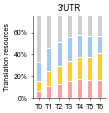

In [180]:
# Meiosis_specific RNAs ranked by structure
dfRibo = df[tps + ['Merged_3utr_gini', 'Meiosis_specific']]
dfRibo.columns = ['V', 'P', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'rank', 'meiotic']
t = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
dfRibo['rank'] = dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].rank()/dfRibo.loc[(dfRibo.meiotic == 'yes'), 'rank'].dropna().shape[0]

dfRibo['grank'] = 'Others'
dfRibo.loc[(dfRibo['rank'] >= 0 ) & (dfRibo.meiotic == 'yes'), 'grank'] = 'simple'
dfRibo.loc[(dfRibo['rank'] >= 1/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'moderate'
dfRibo.loc[(dfRibo['rank'] >= 2/3)& (dfRibo.meiotic == 'yes'), 'grank'] = 'complex'

# sum the ribo translation resources
dfb = dfRibo.groupby('grank').sum()[t]/dfRibo.sum()[t]

width = 0.5
plt.figure(figsize=(1.3, 1.5))
plt.bar(dfb.columns, dfb.loc['complex'], label = 'complex', color = '#FF9F9B', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['moderate'], bottom=dfb.loc['complex'], 
        label = 'moderate', color = '#FFCE2E', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['simple'],bottom=dfb.loc['complex']+ dfb.loc['moderate'], 
        label = 'simple', color = '#A1C9F4', width=width, edgecolor='white')

plt.bar(dfb.columns, dfb.loc['Others'],bottom=dfb.loc['complex']+ dfb.loc['moderate']+dfb.loc['simple'],
        label = 'Others', color = '#CFCFCF', width=width, edgecolor='white')

plt.yticks([0, 0.2, 0.4, 0.6], ['0%', '20%', '40%', '60%'])
plt.ylabel('Translation resources')
plt.ylim(0, 0.75)
plt.title('3ʹUTR')
# plt.legend(loc = (1,0.2))

# plt.savefig('5_Figure/fig4-b translation resource allocation 3utr.pdf',  bbox_inches = 'tight')
plt.show()

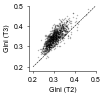

In [246]:
# df = pd.read_excel('3_Table/Summary_RNA_Gini_MS.xlsx', index_col='GENE_ID')
plt.figure(figsize=(1.2, 1.2))
plt.scatter(df['Gene_gini_7h25'], df['Gene_gini_7h50'], alpha = 0.3, linewidths = 0, color = 'k',
           s=2)
plt.plot([0.2, 0.5], [0.2, 0.5], color = 'k', linestyle = '--',  linewidth = 0.5)
plt.xlim(0.18, 0.5)
plt.ylim(0.18, 0.5)
plt.xticks([0.2, 0.3,0.4,0.5])
plt.yticks([0.2, 0.3, 0.4,0.5])
plt.xlabel('Gini (T2)')
plt.ylabel('Gini (T3)')
plt.savefig('5_Figure/fig4-d 7h25Gini vs 7h50Gini.pdf',  bbox_inches = 'tight')
plt.show()

In [210]:
df1 = pd.read_csv('3_Table/figs4 T2 vs T3 reactivity.csv')

In [211]:
stats.spearmanr(df1.Reactivity1, df1.Reactivity2)

SpearmanrResult(correlation=0.7554159221464398, pvalue=0.0)

In [214]:
df2 = df1[df1.Sequence.isin(['A', "C"]) & (df1.depth1 > 1000) & (df1.depth2 > 1000)]
dfsize = pd.DataFrame(df2.groupby('Gene').size())
df2  = df2[df2.Gene.isin(dfsize[dfsize[0] >= 20].index)]

In [229]:
stats.spearmanr(df2.Reactivity1, df2.Reactivity2)

SpearmanrResult(correlation=0.8675415551728645, pvalue=0.0)

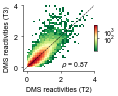

In [254]:
fig, ax = plt.subplots(figsize=(1.5, 1.2))
g = plt.hist2d(df2.Reactivity1, df2.Reactivity2,
               bins = [i/10 for i in range(50)], cmap = 'RdYlGn_r', norm = colors.LogNorm())
plt.plot([-0.2, 5], [-0.2, 5], color = 'k', linestyle = '--',  linewidth = 0.5)
plt.xlim(-0.2, 4)
plt.ylim(-0.2, 4)
plt.xticks([0,2,4])
plt.yticks([0,2,4])
fig.colorbar(g[3], ax=ax, shrink= .40, pad =  0, aspect = 10, ticks = [0, 100, 1000])
plt.xlabel('DMS reactivities (T2)')
plt.ylabel('DMS reactivities (T3)')
plt.text(x = 2, y = 0.1, s = r'$\rho$ = 0.87')
plt.savefig('5_Figure/fig4-e 7h25Reac vs 7h50Reac.pdf', bbox_inches = 'tight')
plt.show()